In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-splitter-newtensor/__results__.html
/kaggle/input/mnist-splitter-newtensor/MNIST.tar.gz
/kaggle/input/mnist-splitter-newtensor/svload
/kaggle/input/mnist-splitter-newtensor/stload
/kaggle/input/mnist-splitter-newtensor/__notebook__.ipynb
/kaggle/input/mnist-splitter-newtensor/__output__.json
/kaggle/input/mnist-splitter-newtensor/custom.css
/kaggle/input/mnist-splitter-newtensor/MNIST/processed/training.pt
/kaggle/input/mnist-splitter-newtensor/MNIST/processed/test.pt
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/t10k-labels-idx1-ubyte
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/t10k-images-idx3-ubyte.gz
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/t10k-labels-idx1-ubyte.gz
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/train-labels-idx1-ubyte.gz
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/t10k-images-idx3-ubyte
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/train-labels-idx1-ubyte
/kaggle/input/mnist-splitter-newtensor/MNIST/raw/train-images-id

In [83]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
cgan_data = torch.load('../input/conditional-gan/gan_data_epoch_200')
print(cgan_data)

**GAN Samples**

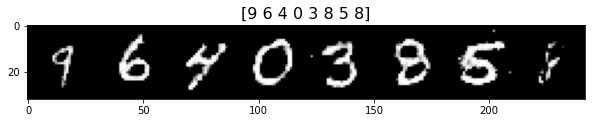

In [84]:
#plotting samples
from torchvision.utils import make_grid
for batch_idx, (temp, target) in enumerate(cgan_data):
    img_grid = make_grid(temp[0:8,], nrow=8)
    img_target_labels = target[0:8,].numpy()
    break
    
plt.imshow(img_grid.detach().cpu().numpy().transpose((1,2,0)))
plt.rcParams['figure.figsize'] = (10, 2)
plt.title(img_target_labels, size=16)
plt.show()

In [85]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainloader = cgan_data

In [86]:
len(trainloader)

938

In [87]:
dataiter = iter(trainloader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)


if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

model=nn.Sequential(nn.Linear(784,128), # 1 layer:- 784 input 128 o/p
                    nn.ReLU(),          # Defining Regular linear unit as activation
                    nn.Linear(128,64),  # 2 Layer:- 128 Input and 64 O/p
                    nn.Tanh(),          # Defining Regular linear unit as activation
                    nn.Linear(64,10),   # 3 Layer:- 64 Input and 10 O/P as (0-9)
                    nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
                  ) 
model.to(device)
criterion = nn.NLLLoss() 

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
images = images.to(device)
labels = labels.to(device)
logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL-loss

loss.backward() # to calculate gradients of parameter 

# defining the optimiser with stochastic gradient descent and default parameters
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images = images.detach().clone()
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()
images = images.to(device)
labels = labels.to(device)
# Forward pass
output = model(images)
loss = criterion(output, labels)
# the backward pass and update weights
loss.backward()

time0 = time()
epochs = 15 # total number of iteration for training
running_loss_list= []
epochs_list = []
loss_score = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatenning MNIST images with size [64,784]
        images = images.view(images.shape[0], -1) 
    
        # defining gradient in each epoch as 0
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)  
        # modeling for each image batch
        output = model(images)
        
        # calculating the loss
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        # calculating the loss
        running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        loss_score.append(running_loss)
print("\nTraining Time (in minutes) =",(time()-time0)/60)

torch.Size([64, 1, 28, 28])
torch.Size([64])
Initial weights -  Parameter containing:
tensor([[ 2.2633e-02, -3.1080e-02, -2.7442e-02,  ...,  5.2933e-05,
         -2.9831e-02, -1.5342e-02],
        [-1.2230e-02, -1.3958e-03,  1.8965e-02,  ..., -2.7733e-02,
         -3.4206e-02, -2.3475e-02],
        [ 2.3190e-02, -3.6998e-04,  1.7099e-02,  ..., -1.6497e-02,
         -9.3681e-05,  3.2975e-02],
        ...,
        [ 2.7891e-02,  1.5376e-02,  1.2643e-02,  ..., -1.1309e-02,
          2.8849e-02, -2.0394e-02],
        [-3.3046e-02,  2.6064e-02,  3.4893e-02,  ..., -3.0379e-02,
          2.8542e-02,  4.0801e-03],
        [-1.5096e-02, -1.5242e-02,  2.3291e-03,  ...,  1.9759e-02,
          2.6779e-02, -1.6547e-02]], device='cuda:0', requires_grad=True)
Epoch 0 - Training loss: 0.2925136252395761
Epoch 1 - Training loss: 0.07752443072018719
Epoch 2 - Training loss: 0.046019104861670226
Epoch 3 - Training loss: 0.03220241326530442
Epoch 4 - Training loss: 0.02458837391860259
Epoch 5 - Training l

In [88]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [89]:
""")Sv')"""

testloader = torch.load('../input/mnist-splitter/svdash_dataloader')

In [90]:
len(testloader)

157

In [91]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    
    img = images[i].view(1, 784)
    img = img.to('cuda')
    with torch.no_grad():
      
      logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10003

Model Accuracy = 0.9524142757172848
